In [7]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering.IntervalKMeans import IntervalKMeans
from interClusLib.visualization.IntervalParallelCoordinates import IntervalParallelCoordinates
from interClusLib.visualization.IntervalRadarChart import IntervalRadarChart

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 5)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         14.286682        24.215994        65.088847        80.313976   
1          0.077877        81.643187        79.834512        99.221156   
2          2.306243        85.835880        32.595891        52.477466   
3         23.277134        34.866599         9.060643         9.617655   
4         46.676289        83.771011        67.569012        85.994041   
5         69.578440        94.220176        22.855002        56.328822   
6         24.102547        26.082917        68.326352        99.625370   
7         18.870711        39.106061        18.223609        27.887135   
8         40.450813        56.770033         3.131329        88.777010   
9         66.898825        92.665887        58.068662        72.727200   
10        28.392097        96.117202        30.536386        84.453

In [8]:
model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

print(model.labels_)

[0 3 0 2 1 3 0 2 1 1 1 3 3 0 1 1 0 3 1 1 1 2 1 2 2 0 3 0 0 2]


<Figure size 1500x800 with 0 Axes>

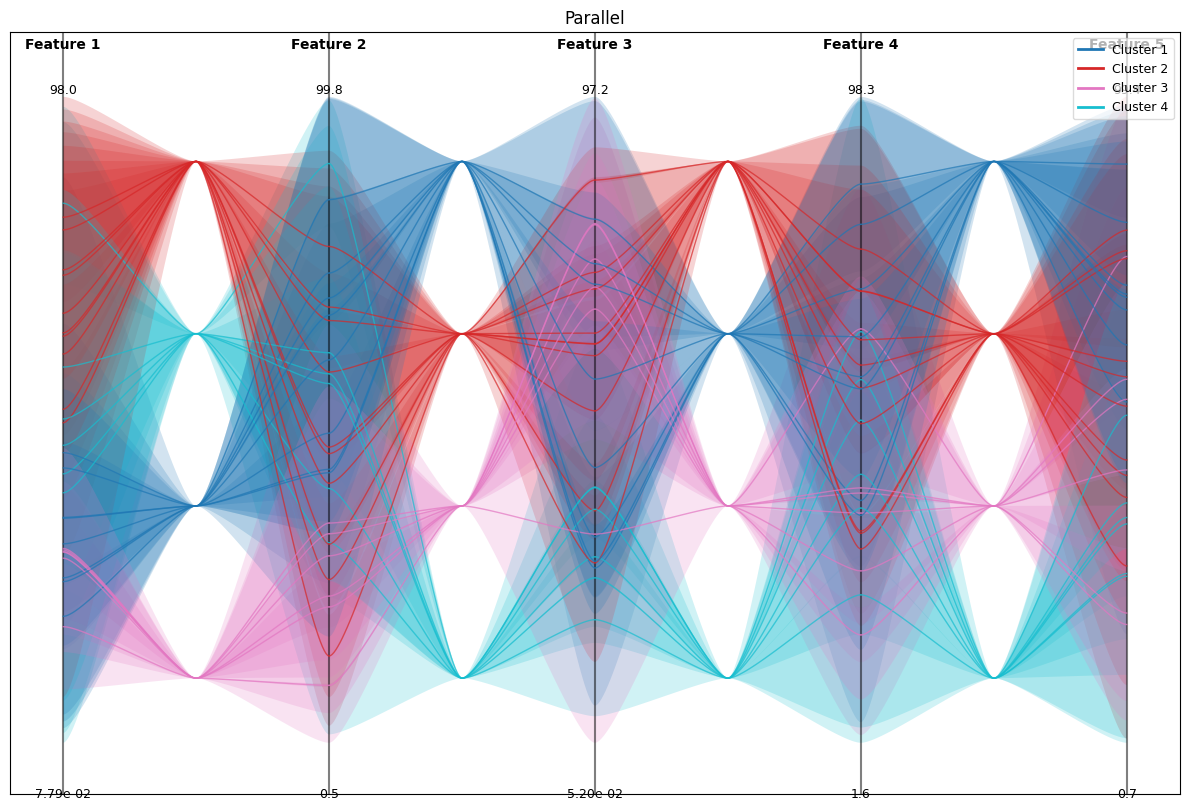

In [14]:
plt.figure(figsize=(15, 8))
IntervalParallelCoordinates.plot_interval_curves(data = random_data.get_intervals(), feature_names= None, clusters=model.labels_, beta=1)
plt.title("Parallel")
plt.show()

<Figure size 1500x800 with 0 Axes>

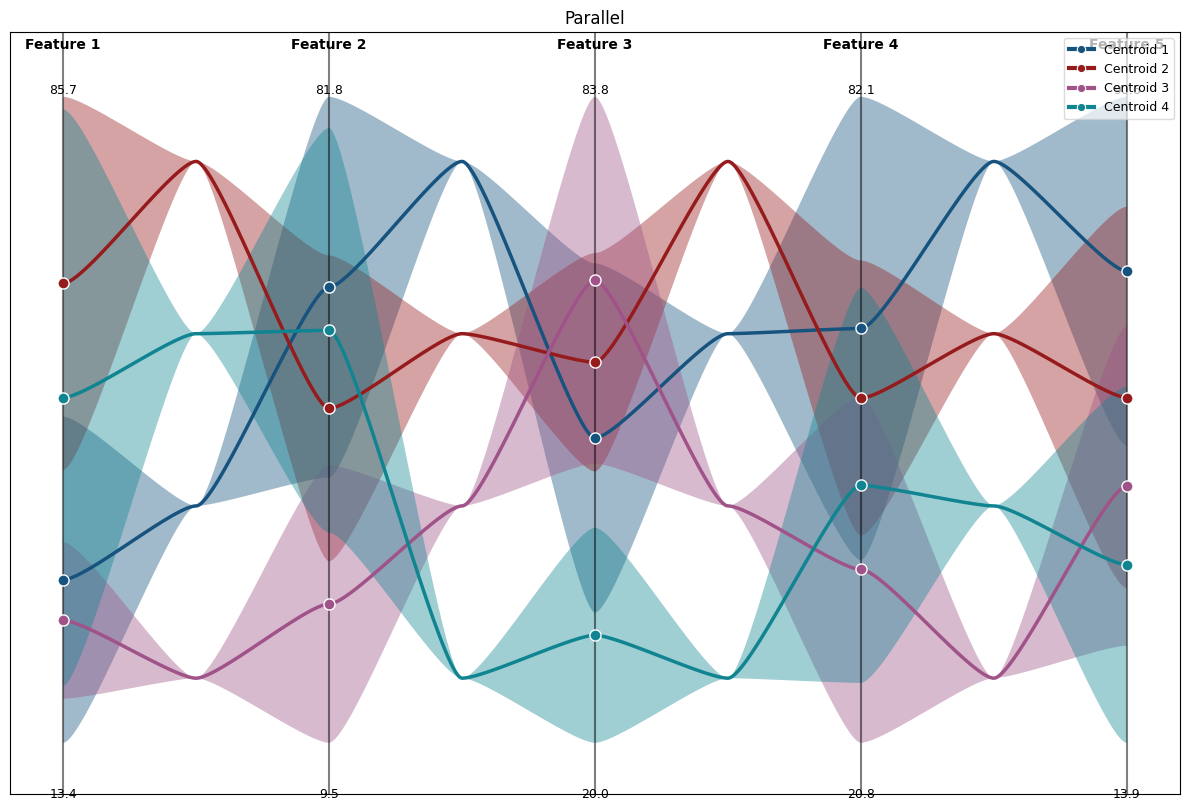

In [10]:
plt.figure(figsize=(15, 8))
IntervalParallelCoordinates.plot_interval_curves(data = None, feature_names= None, clusters=model.labels_, centroids = model.centroids_, beta = 1)
plt.title("Parallel")
plt.show()

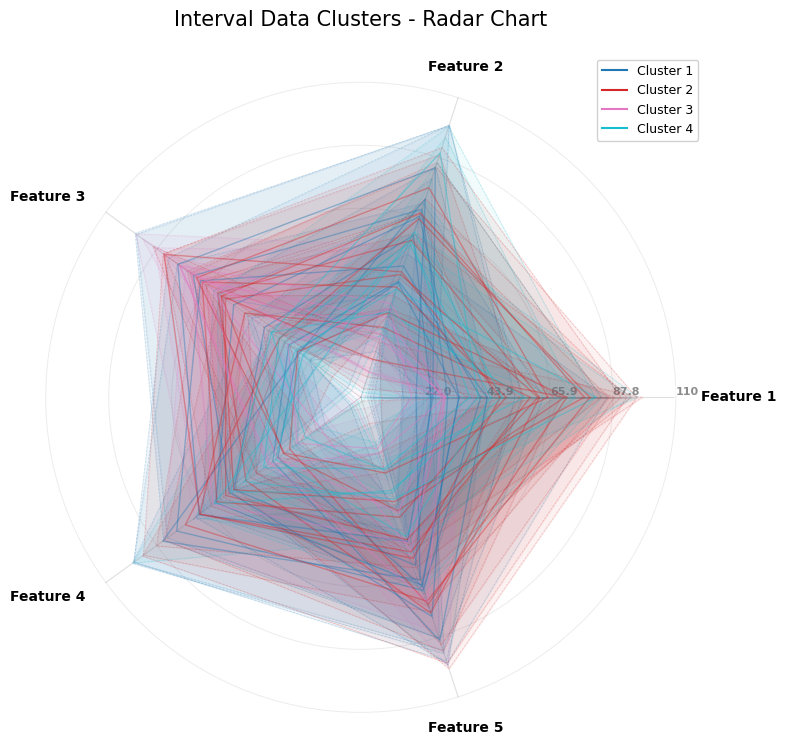

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

IntervalRadarChart.plot_interval_radar(
        data=random_data.get_intervals(), 
        feature_names=None, 
        clusters=model.labels_, 
        centroids=None, 
        ax=ax, 
        use_color=True,
        uncertainty_alpha=0.15
    )
    
plt.title('Interval Data Clusters - Radar Chart', size=15, pad=20)
plt.tight_layout()
plt.show()

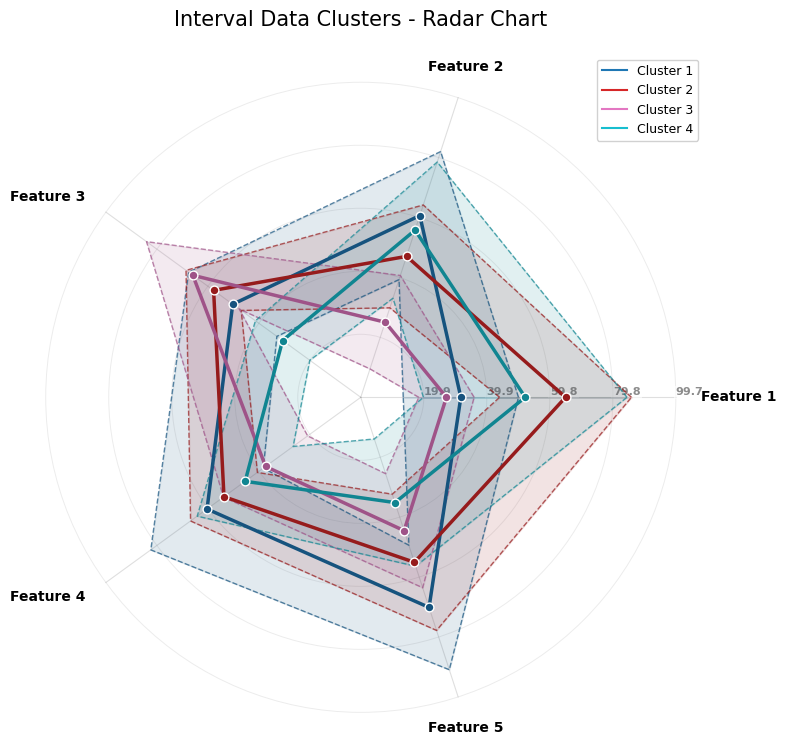

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

IntervalRadarChart.plot_interval_radar(
        data=None, 
        feature_names=None, 
        clusters=model.labels_, 
        centroids=model.centroids_, 
        ax=ax, 
        use_color=True,
        uncertainty_alpha=0.15
    )
    
plt.title('Interval Data Clusters - Radar Chart', size=15, pad=20)
plt.tight_layout()
plt.show()